In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns

In [30]:
csv_files = glob.glob(f"crossover-data\\*.csv")
df_list = [pd.read_csv(file, header=None, names=['parent1_fit', 'parent2_fit', 'child_fit', 'repr']) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [31]:
df

parent1_fit  parent2_fit  child_fit  repr
0           1.022175     1.022175   0.128739     9
1           1.022175     0.000000   0.646920     9
2           1.022175     0.000000   0.000000     9
3           1.022175     0.000000   0.421083     9
4           1.022175     0.146668   0.516455     9
...              ...          ...        ...   ...
1457763     0.647898     0.879412   0.315794     0
1457764     0.647898     0.882532   0.272716     0
1457765     0.647898     0.885620   0.113590     0
1457766     0.647898     0.888099   0.327879     0
1457767     0.647898     0.889840   0.201213     0

[1457768 rows x 4 columns]

In [32]:
sorted(df['repr'].unique())

[0, 1, 4, 9]

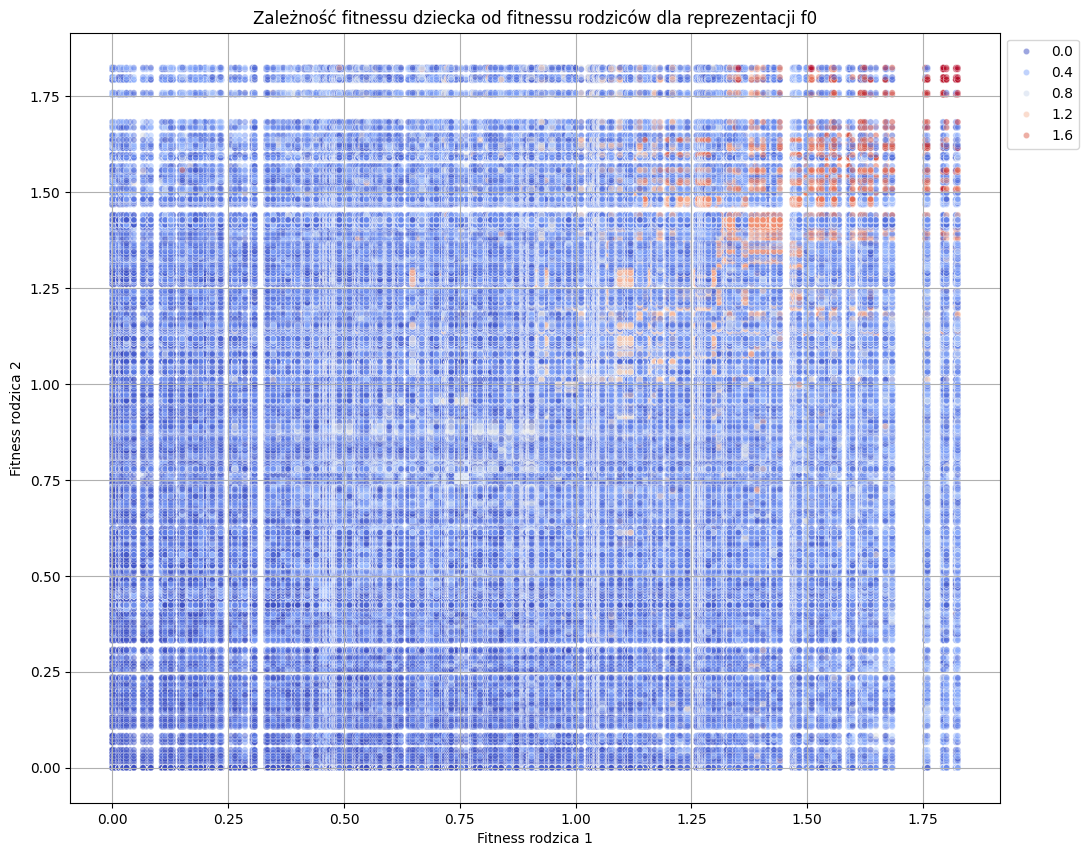

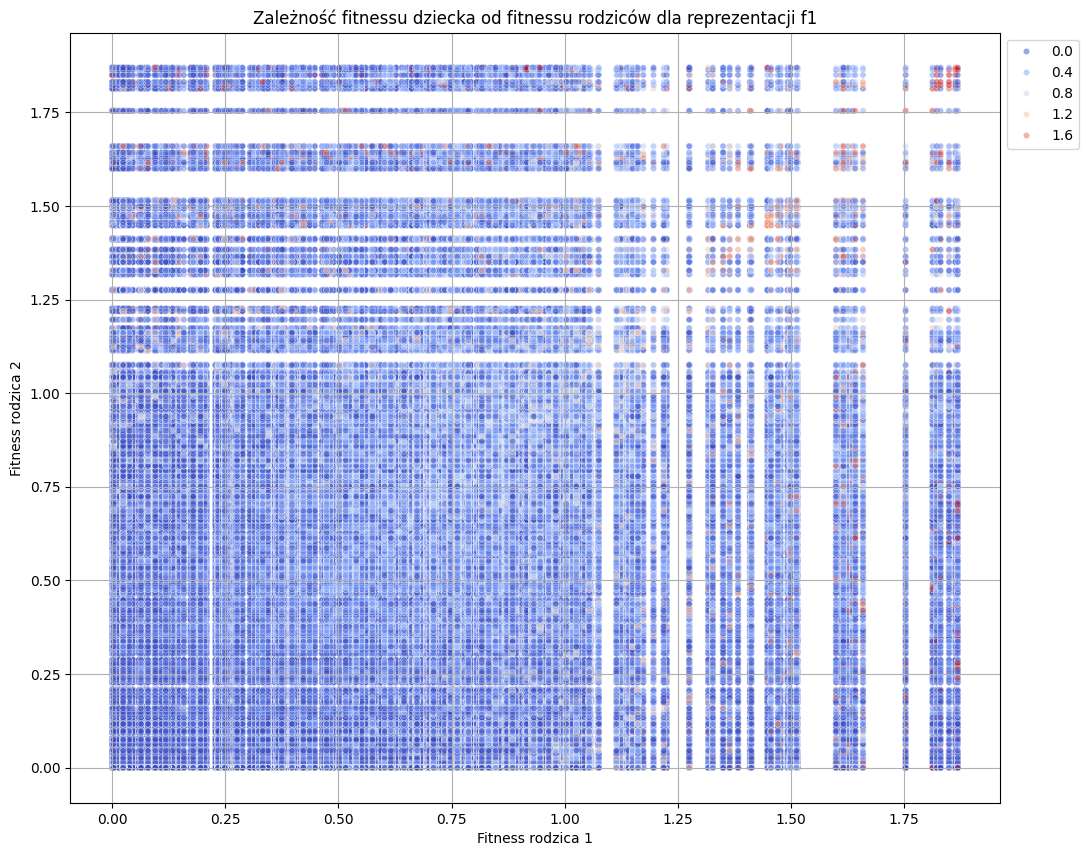

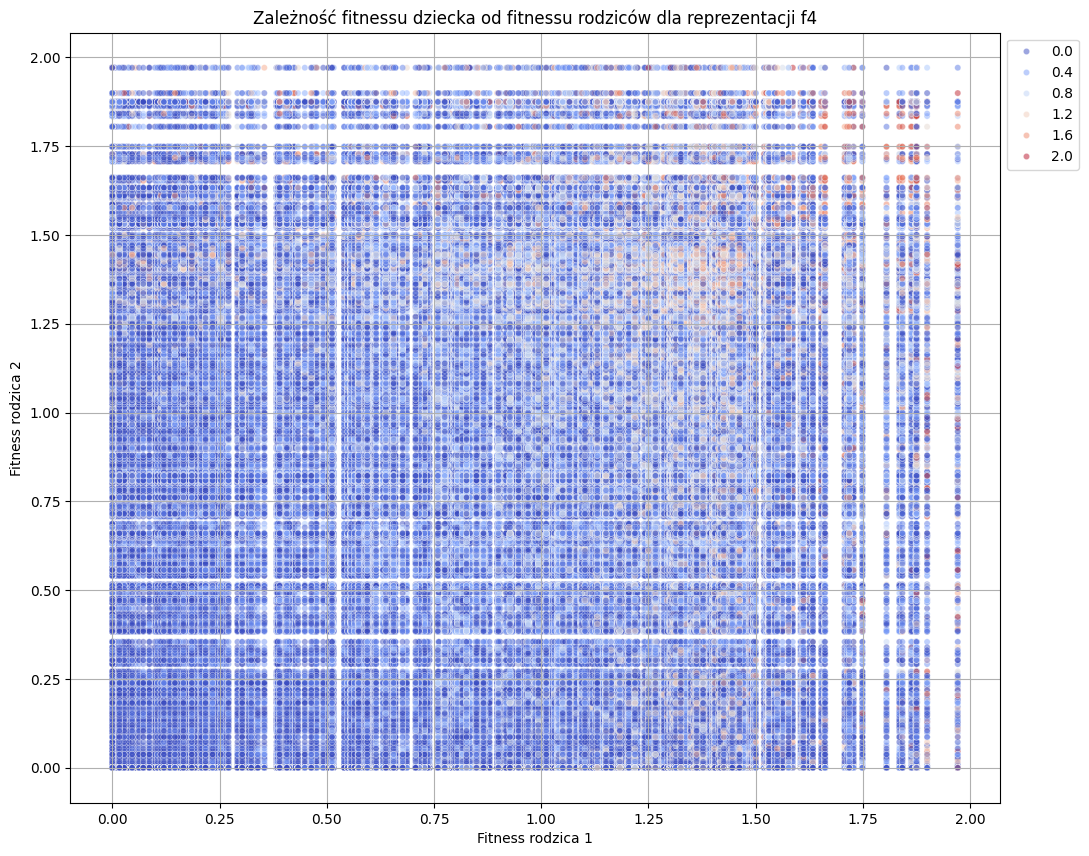

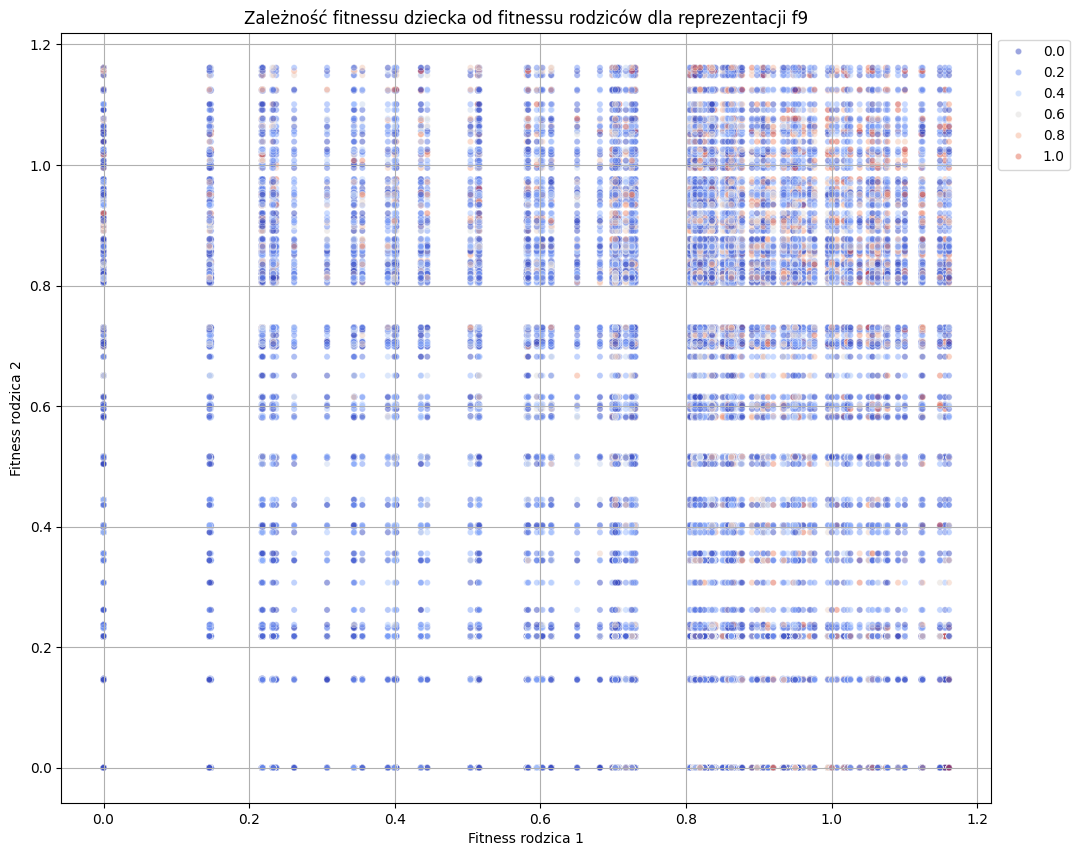

In [52]:
for repr in sorted(df['repr'].unique()):
    df_repr = df[df['repr'] == repr]
    plt.figure(figsize=(12, 10))
    scatter = sns.scatterplot(data=df_repr, x='parent1_fit', y='parent2_fit', hue='child_fit', palette='coolwarm', alpha=0.5, s=20)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f'Zależność fitnessu dziecka od fitnessu rodziców dla reprezentacji f{repr}')
    plt.xlabel('Fitness rodzica 1')
    plt.ylabel('Fitness rodzica 2')
    plt.grid(True)
    plt.show()

In [34]:
df['child_better'] = df.apply(lambda row: 1 if row['child_fit'] > ((row['parent1_fit'] + row['parent2_fit']) / 2) else 0, axis=1)

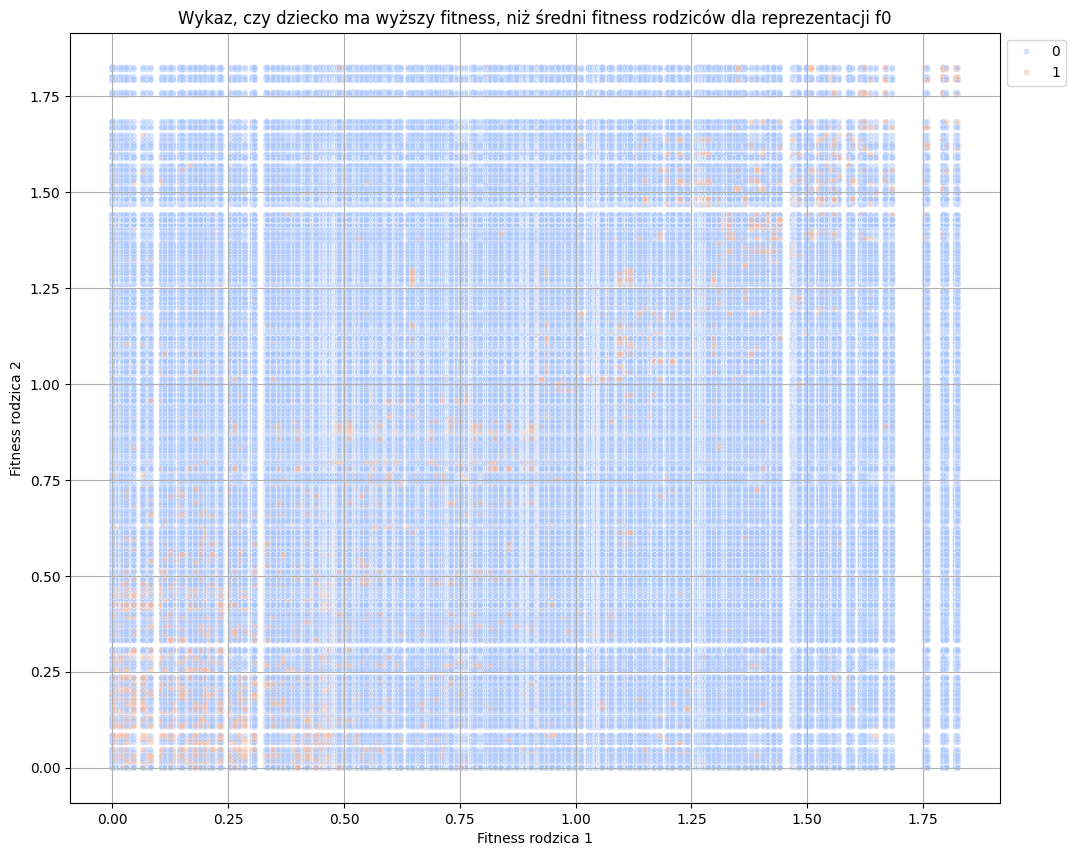

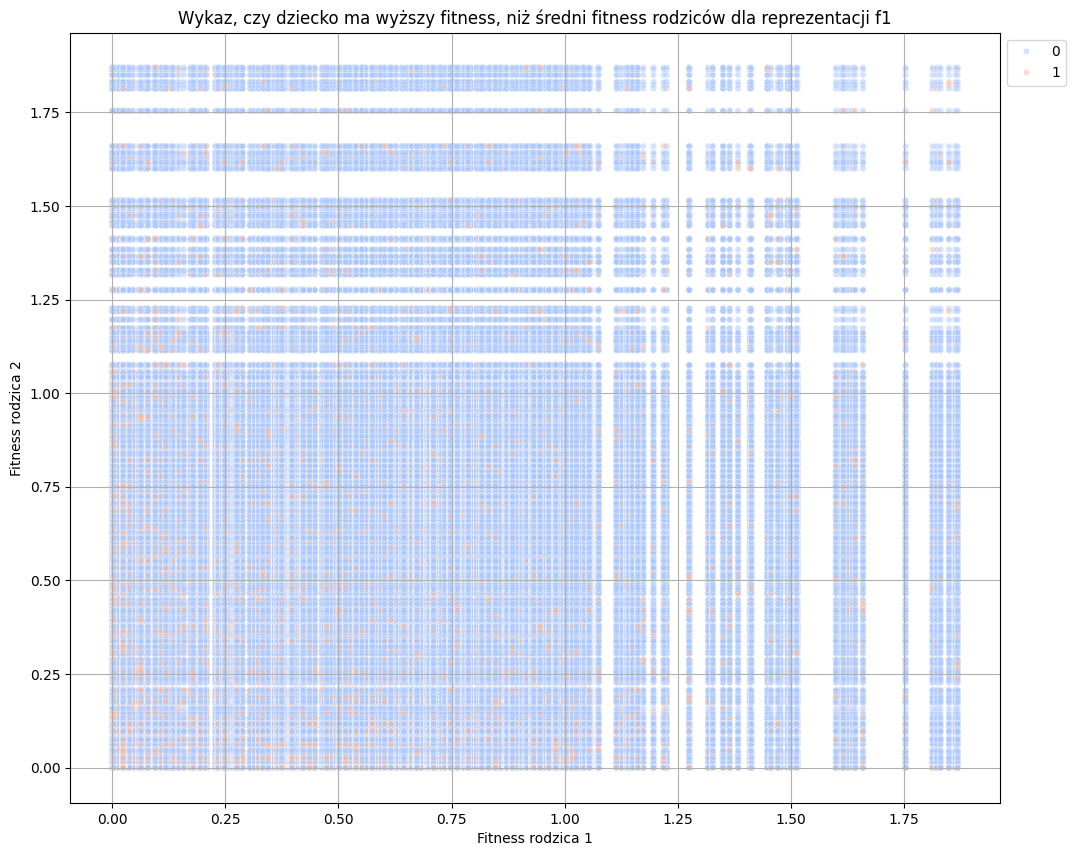

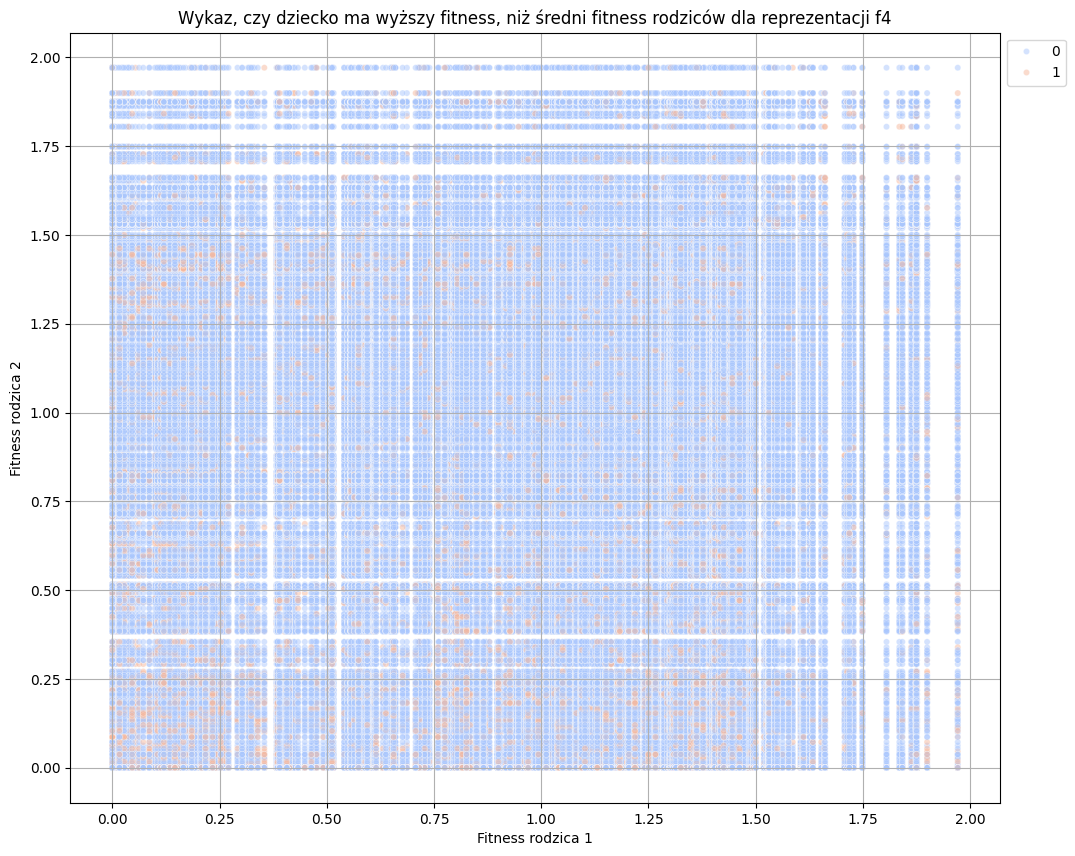

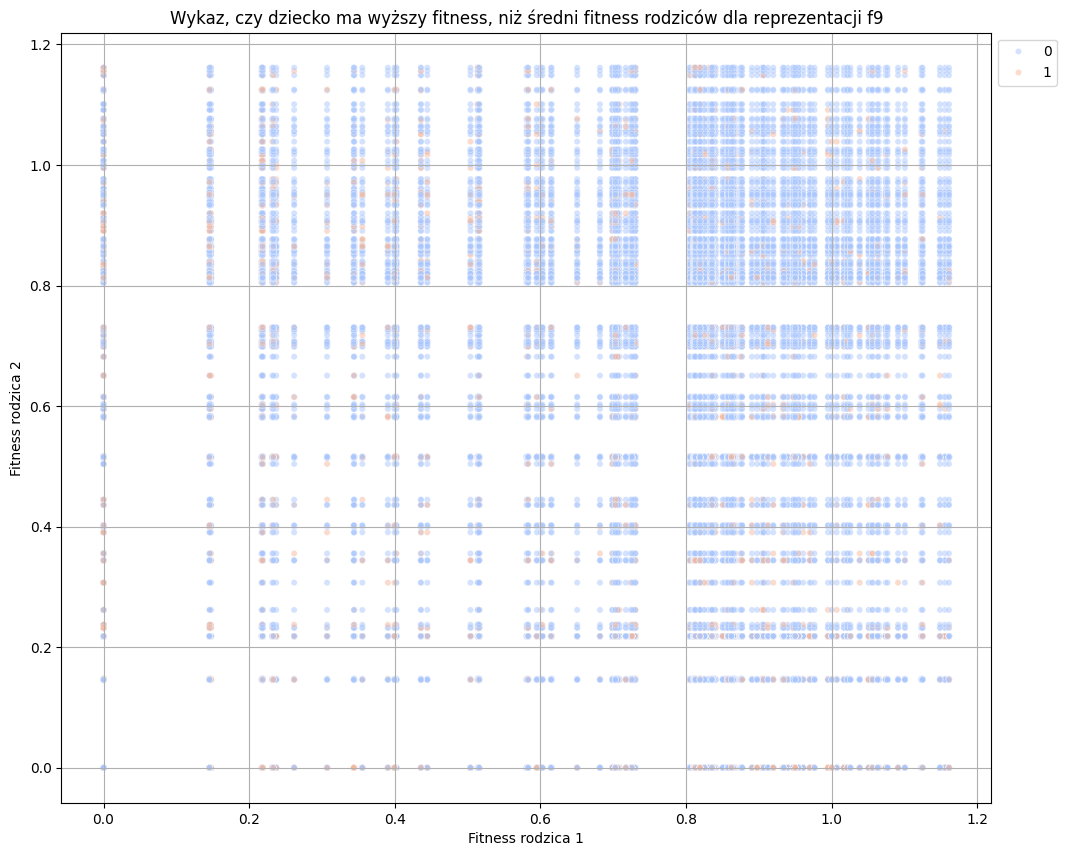

In [50]:
for repr in sorted(df['repr'].unique()):
    df_repr = df[df['repr'] == repr]
    plt.figure(figsize=(12, 10))
    scatter = sns.scatterplot(data=df_repr, x='parent1_fit', y='parent2_fit', hue='child_better', palette='coolwarm', alpha=0.5, s=20)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f'Wykaz, czy dziecko ma wyższy fitness, niż średni fitness rodziców dla reprezentacji f{repr}')
    plt.xlabel('Fitness rodzica 1')
    plt.ylabel('Fitness rodzica 2')
    plt.grid(True)
    plt.show()

In [36]:
for repr in sorted(df['repr'].unique()):
    df_repr = df[df['repr'] == repr]
    print(f'f{repr}: {df_repr["child_better"].mean()*100:0.2f}%')

f0: 5.06%
f1: 11.09%
f4: 8.91%
f9: 15.49%
